In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/aerofit_treadmill.csv")

##About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


##Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


###***Q1.Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.shape

(180, 9)

In [6]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

##Q2. Detect Outliers
>○ Find the outliers for every continuous variable in the dataset

>○ Remove/clip the data between the 5 percentile and 95 percentile

In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


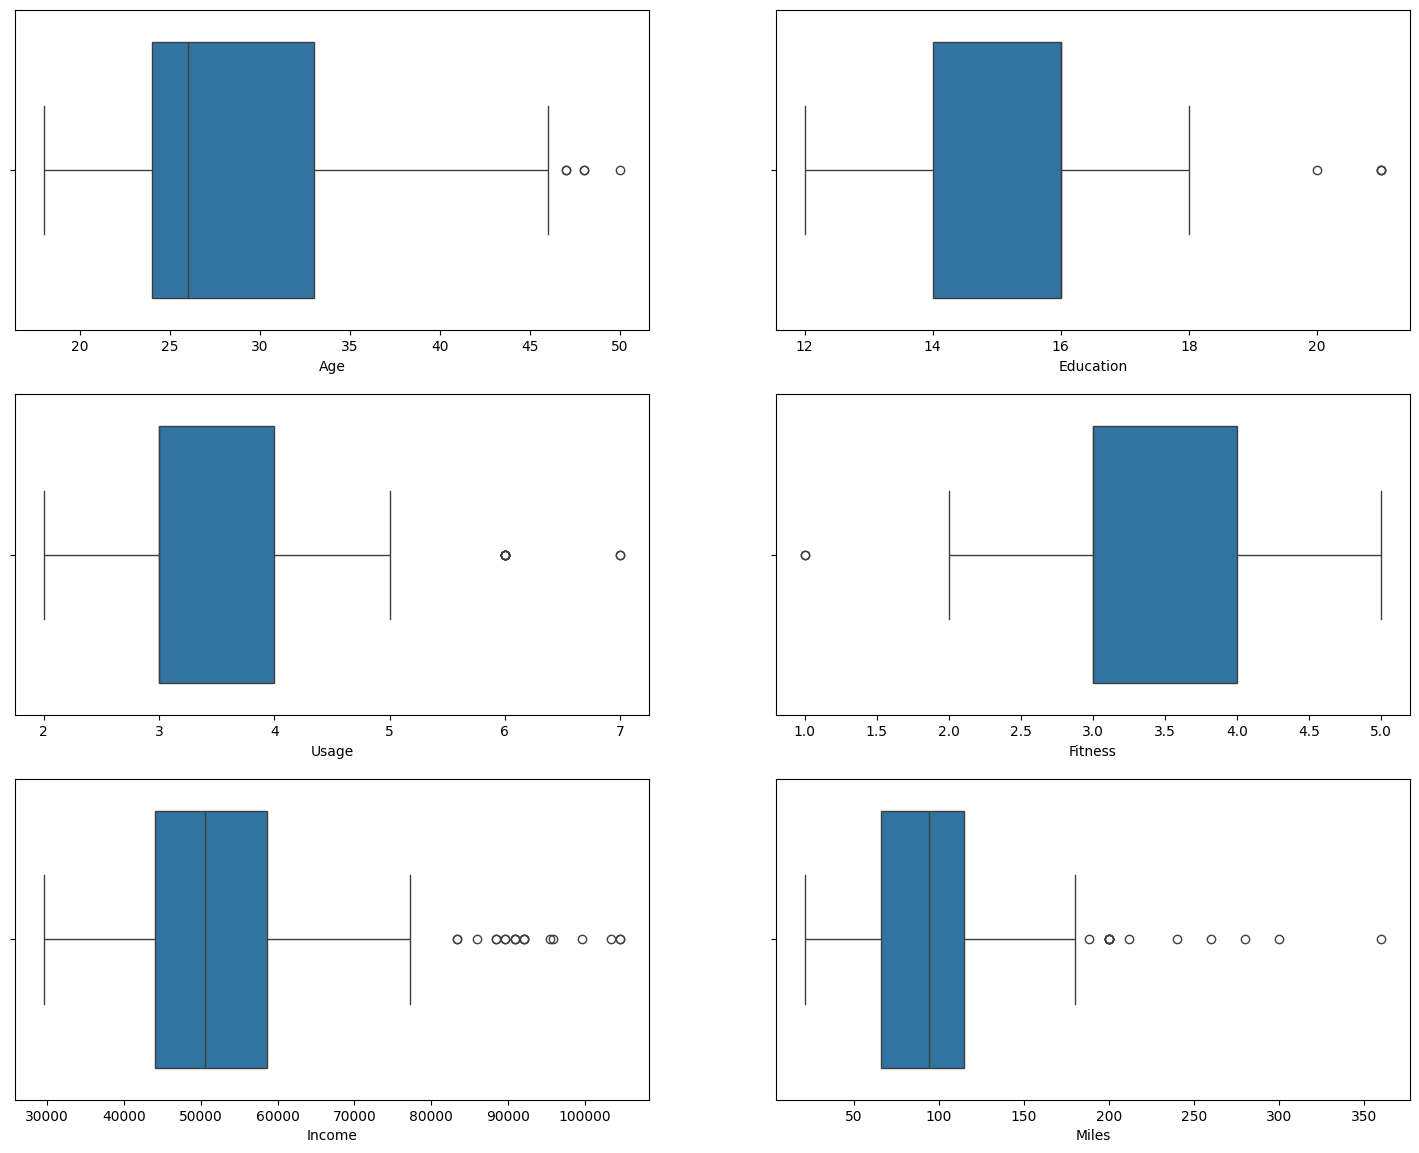

In [8]:
fig, axis = plt.subplots(nrows = 3, ncols = 2 , figsize = (18,10))
fig.subplots_adjust(top=1.2)
sns.boxplot(data = df, x = 'Age', orient = 'h', ax= axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

In [9]:
p_05 = df[['Age','Education','Usage','Fitness','Income','Miles']].quantile(0.05)
p_95 = df[['Age','Education','Usage','Fitness','Income','Miles']].quantile(0.95)

In [10]:
p_05

Age             20.00
Education       14.00
Usage            2.00
Fitness          2.00
Income       34053.15
Miles           47.00
Name: 0.05, dtype: float64

In [11]:
p_95

Age             43.05
Education       18.00
Usage            5.05
Fitness          5.00
Income       90948.25
Miles          200.00
Name: 0.95, dtype: float64

In [12]:
df_clip = df[['Age','Education','Usage','Fitness','Income','Miles']].clip(p_05,p_95,axis = 1)

In [13]:
df_clip

,Age,Education,Usage,Fitness,Income,Miles
0,20.00,14,3.00,4,34053.15,112
1,20.00,15,2.00,3,34053.15,75
2,20.00,14,4.00,3,34053.15,66
3,20.00,14,3.00,3,34053.15,85
4,20.00,14,4.00,2,35247.00,47
...,...,...,...,...,...,...
175,40.00,18,5.05,5,83416.00,200
176,42.00,18,5.00,4,89641.00,200
177,43.05,16,5.00,5,90886.00,160
178,43.05,18,4.00,5,90948.25,120


###***Q3. Check if features like marital status, Gender, and age have any effect on the product purchased***
>○ Find if there is any relationship between the categorical variables and the output variable in the data.

>○ Find if there is any relationship between the continuous variables and the output variable in the data.

In [14]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [15]:
for col in df.columns:
    print()
    print('Total Unique Values in',col,'column are :-',df[col].nunique())
    print('Unique Values in',col,'column are :-\n',df[col].unique())
    print()
    print('-'*100)


Total Unique Values in Product column are :- 3
Unique Values in Product column are :-
 ['KP281' 'KP481' 'KP781']

----------------------------------------------------------------------------------------------------

Total Unique Values in Age column are :- 32
Unique Values in Age column are :-
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

----------------------------------------------------------------------------------------------------

Total Unique Values in Gender column are :- 2
Unique Values in Gender column are :-
 ['Male' 'Female']

----------------------------------------------------------------------------------------------------

Total Unique Values in Education column are :- 8
Unique Values in Education column are :-
 [14 15 12 13 16 18 20 21]

----------------------------------------------------------------------------------------------------

Total Unique Values in MaritalStatus column are :- 2
Unique Values in Marit

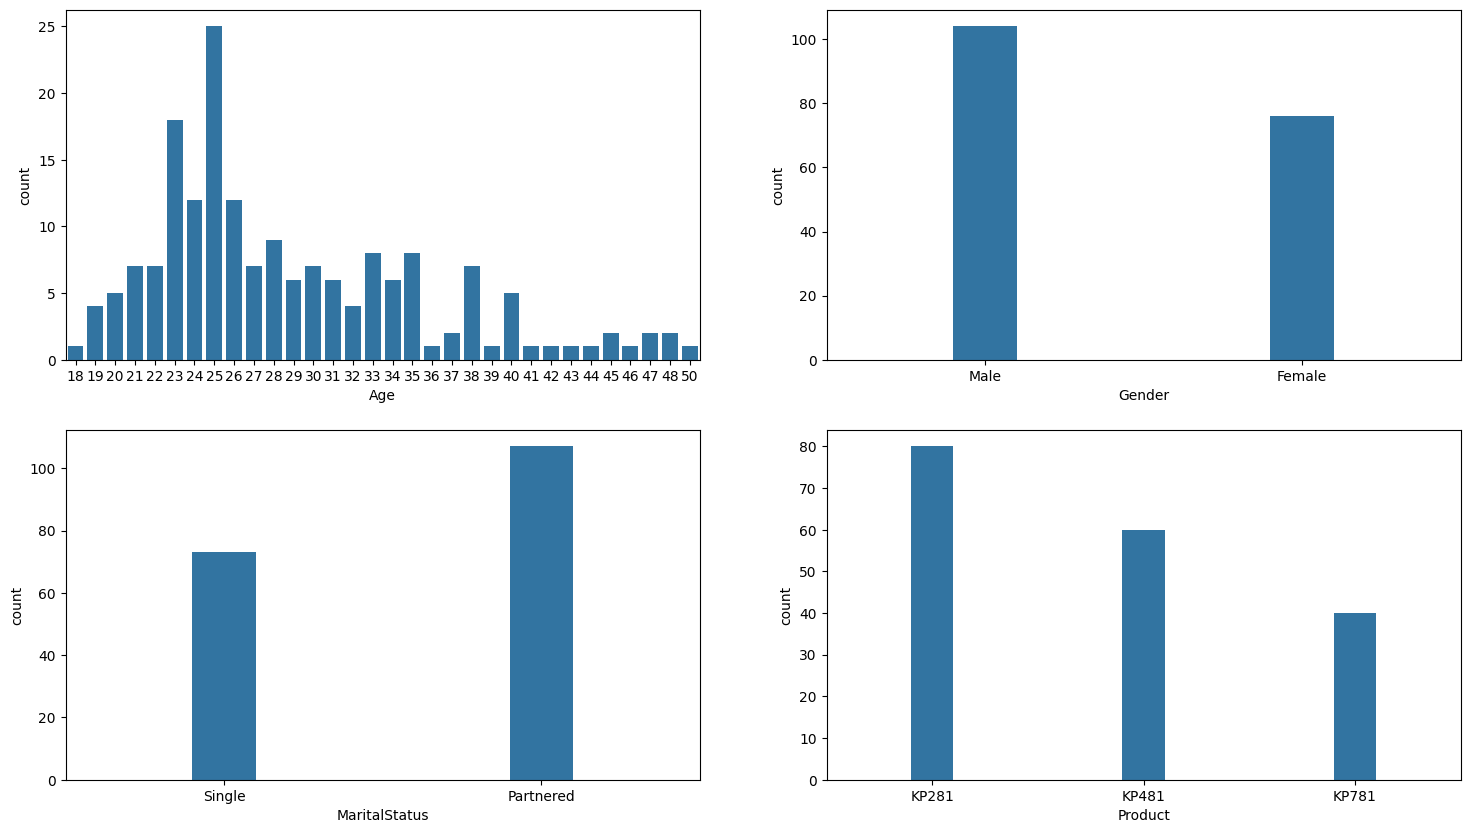

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
sns.countplot(data=df, x='Age', ax=axs[0,0])
sns.countplot(data=df, x='Gender',width = 0.2, ax=axs[0,1])
sns.countplot(data=df, x='MaritalStatus',width = 0.2, ax=axs[1,0])
sns.countplot(data=df, x='Product',width = 0.2, ax=axs[1,1])


plt.show()

In [17]:
cols = ['Product','Gender','Education','MaritalStatus','Usage','Fitness']

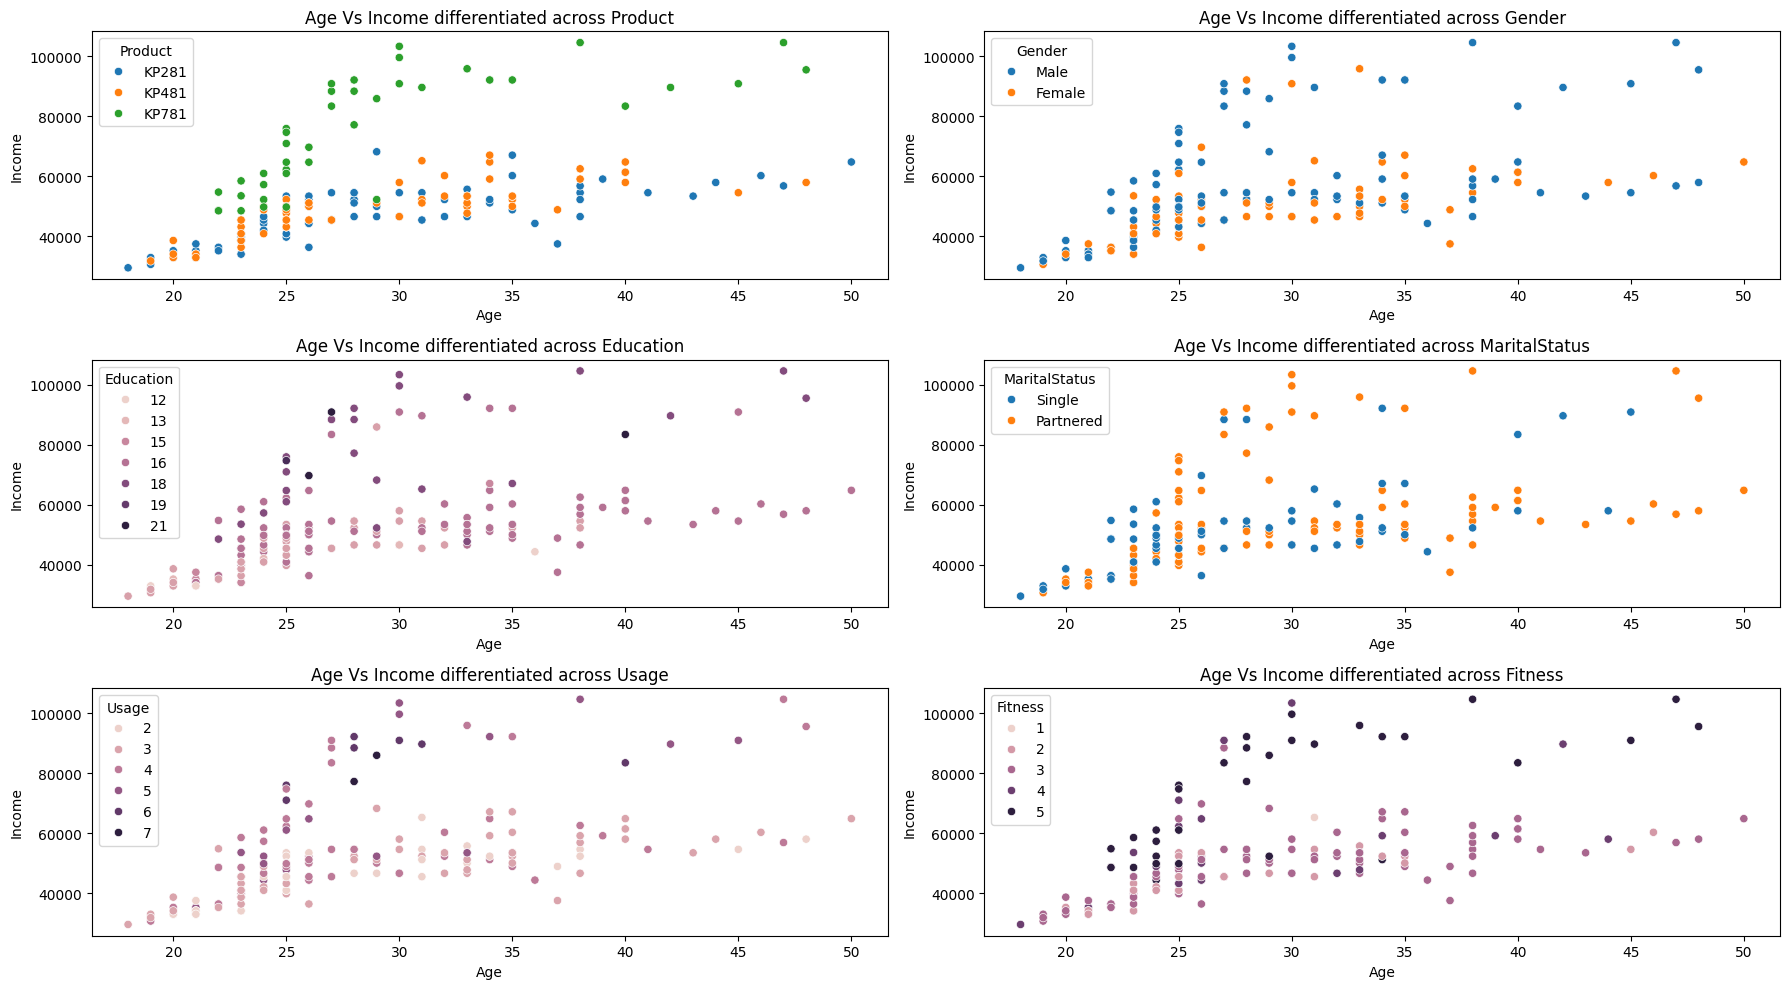

In [18]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(18, 10))
axes = axes.flatten()
i = 0
for col in cols:
    sns.scatterplot(data=df,x='Age',y='Income',hue=col,ax=axes[i])
    axes[i].set_title(f"Age Vs Income differentiated across {col}")
    i += 1
fig.tight_layout()
plt.show()

###***Q4. Representing the Probability***
○ Find the marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)

○ Find the probability that the customer buys a product based on each column.

○ Find the conditional probability that an event occurs given that another event has occurred. (Example: given that a customer is female, what is the probability she’ll purchase a KP481)


In [19]:
prod_purch=df.Product.value_counts(normalize=True).to_frame()

In [20]:
prod_purch=prod_purch.reset_index()

In [21]:
prod_purch['proportion'] = round(prod_purch.proportion*100,2)

In [22]:
prod_purch

,Product,proportion
0,KP281,44.44
1,KP481,33.33
2,KP781,22.22


In [23]:
import plotly.express as px
px.pie(prod_purch,values ='proportion',names = 'Product',color = 'Product',title= 'Product Purchase',hole = 0.2)

In [30]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [48]:
custbuy_age = round(pd.crosstab(df['Age'],df['Product'],margins = True,normalize = True),3)

In [49]:
custbuy_age

Product,KP281,KP481,KP781,All
Age,,,,
18,0.006,0.000,0.000,0.006
19,0.017,0.006,0.000,0.022
20,0.011,0.017,0.000,0.028
21,0.022,0.017,0.000,0.039
22,0.022,0.000,0.017,0.039
23,0.044,0.039,0.017,0.100
24,0.028,0.017,0.022,0.067
25,0.039,0.061,0.039,0.139
26,0.039,0.017,0.011,0.067


In [50]:
custbuy_gender = round(pd.crosstab(df['Gender'],df['Product'],margins = True,normalize = True),3)

In [51]:
custbuy_gender

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222,0.161,0.039,0.422
Male,0.222,0.172,0.183,0.578
All,0.444,0.333,0.222,1.000


In [52]:
custbuy_maritalstatus = round(pd.crosstab(df['MaritalStatus'],df['Product'],margins = True,normalize = True),3)

In [53]:
custbuy_maritalstatus

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.267,0.200,0.128,0.594
Single,0.178,0.133,0.094,0.406
All,0.444,0.333,0.222,1.000


In [54]:
custbuy_edu = round(pd.crosstab(df['Education'],df['Product'],margins = True,normalize = True),3)

In [55]:
custbuy_edu

Product,KP281,KP481,KP781,All
Education,,,,
12,0.011,0.006,0.000,0.017
13,0.017,0.011,0.000,0.028
14,0.167,0.128,0.011,0.306
15,0.022,0.006,0.000,0.028
16,0.217,0.172,0.083,0.472
18,0.011,0.011,0.106,0.128
20,0.000,0.000,0.006,0.006
21,0.000,0.000,0.017,0.017
All,0.444,0.333,0.222,1.000


<ipython-input-59-7b92499d047c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-59-7b92499d047c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-59-7b92499d047c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-59-7b92499d047c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-59-7b92499d047c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

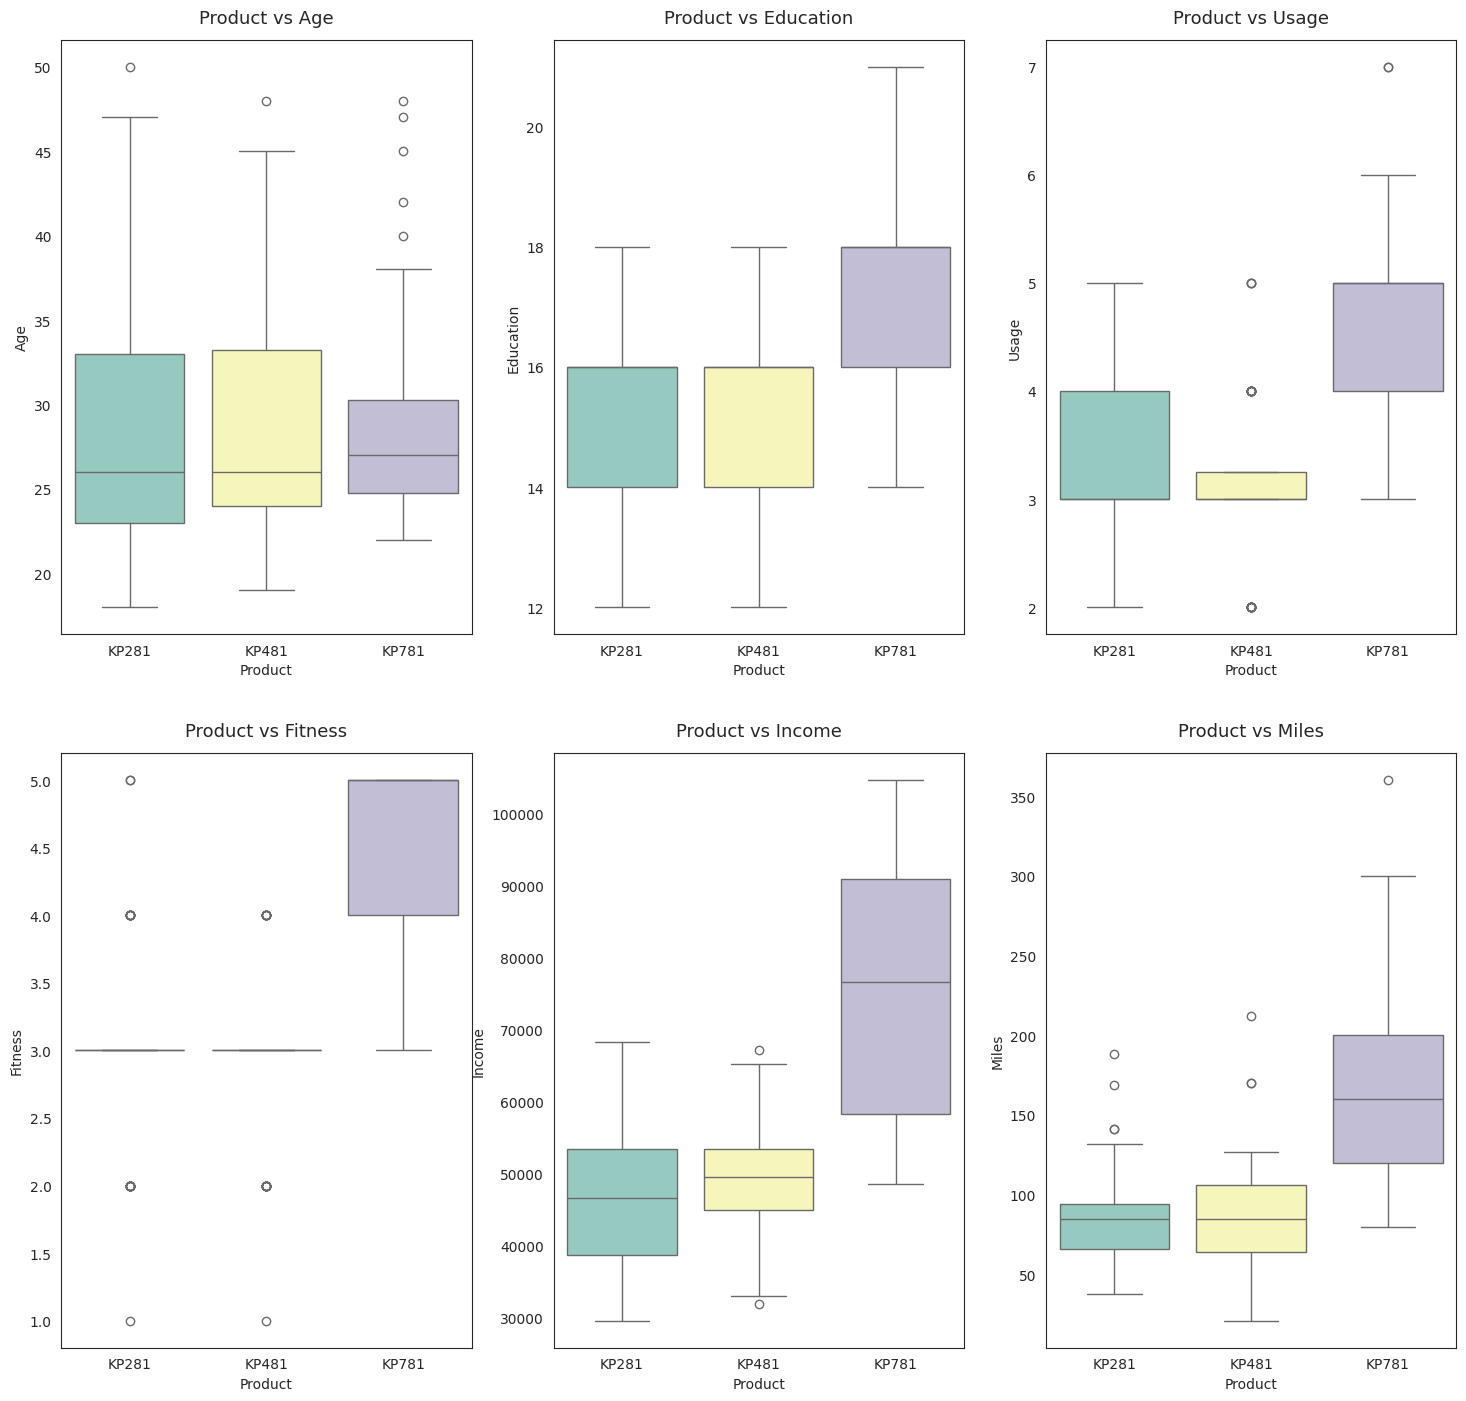

In [59]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

###Q5


In [60]:
dfcorr = df[['Age','Education','Usage','Fitness','Income','Miles']].corr()
dfcorr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


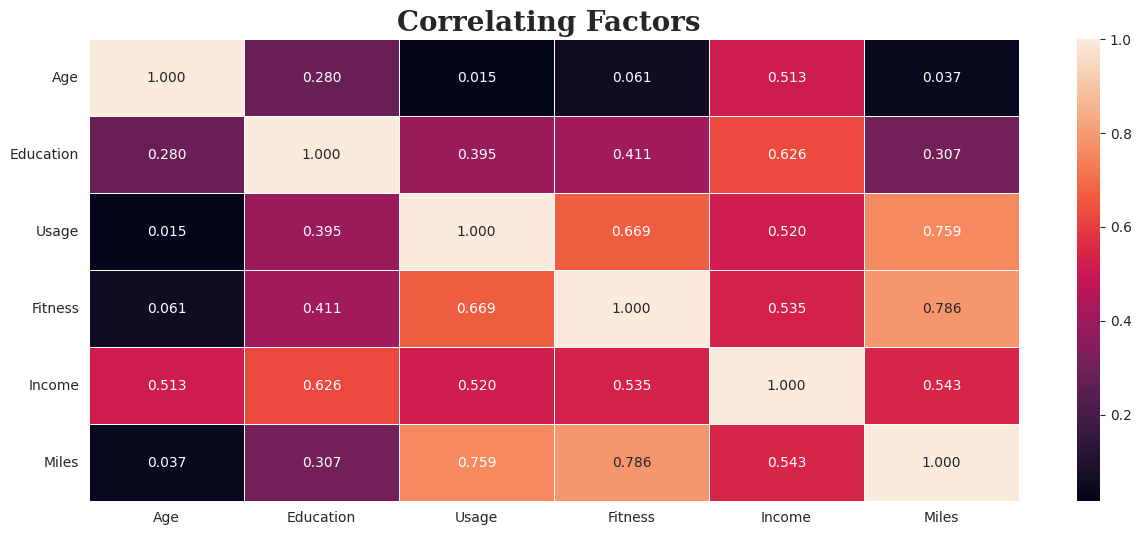

In [62]:
#Correlation HeatMap
plt.figure(figsize=(15,6))
ax = sns.heatmap(dfcorr,annot=True,fmt='.3f',linewidths=.5)
plt.title('Correlating Factors ',fontfamily='serif',fontweight='bold',fontsize=20)
plt.yticks(rotation=0)
plt.show()